In [46]:
library(tidyverse)

## Census data

The [`tidycensus`](https://walkerke.github.io/tidycensus/articles/basic-usage.html) package allows easy downloading of Census and American Community Survey data.

In [47]:
library(tidycensus)
m90 <- get_decennial(geography = "state", variables = "H043A001", year = 1990) %>% print

Getting data from the 1990 decennial Census


# A tibble: 51 x 4
   GEOID NAME                 variable value
   <chr> <chr>                <chr>    <dbl>
 1 01    Alabama              H043A001   325
 2 02    Alaska               H043A001   559
 3 04    Arizona              H043A001   438
 4 05    Arkansas             H043A001   328
 5 06    California           H043A001   620
 6 08    Colorado             H043A001   418
 7 09    Connecticut          H043A001   598
 8 10    Delaware             H043A001   495
 9 11    District of Columbia H043A001   479
10 12    Florida              H043A001   481
# … with 41 more rows


There are thousands of variables with funny names. How do we find variables of interest?

In [48]:
v17 <- load_variables(2017, "acs5", cache = TRUE)
print(v17)

# A tibble: 25,070 x 3
   name       label                           concept                           
   <chr>      <chr>                           <chr>                             
 1 B00001_001 Estimate!!Total                 UNWEIGHTED SAMPLE COUNT OF THE PO…
 2 B00002_001 Estimate!!Total                 UNWEIGHTED SAMPLE HOUSING UNITS   
 3 B01001_001 Estimate!!Total                 SEX BY AGE                        
 4 B01001_002 Estimate!!Total!!Male           SEX BY AGE                        
 5 B01001_003 Estimate!!Total!!Male!!Under 5… SEX BY AGE                        
 6 B01001_004 Estimate!!Total!!Male!!5 to 9 … SEX BY AGE                        
 7 B01001_005 Estimate!!Total!!Male!!10 to 1… SEX BY AGE                        
 8 B01001_006 Estimate!!Total!!Male!!15 to 1… SEX BY AGE                        
 9 B01001_007 Estimate!!Total!!Male!!18 and … SEX BY AGE                        
10 B01001_008 Estimate!!Total!!Male!!20 years SEX BY AGE                        
# … w

Let's find the median household income variable:

In [49]:
v17 %>% filter(str_detect(concept, "INCOME"), 
               str_detect(concept, "MEDIAN"),
               str_detect(concept, "HOUSEHOLD"))

name,label,concept
<chr>,<chr>,<chr>
B10010_001,Estimate!!Median family income in the past 12 months!!Total,MEDIAN FAMILY INCOME FOR FAMILIES WITH GRANDPARENT HOUSEHOLDERS AND/OR SPOUSES LIVING WITH OWN GRANDCHILDREN UNDER 18 YEARS BY RESPONSIBILITY FOR OWN GRANDCHILDREN AND PRESENCE OF PARENT OF GRANDCHILDREN
B10010_002,Estimate!!Median family income in the past 12 months!!Grandparent householder and/or spouse responsible for grandchildren under 18 years (dollars),MEDIAN FAMILY INCOME FOR FAMILIES WITH GRANDPARENT HOUSEHOLDERS AND/OR SPOUSES LIVING WITH OWN GRANDCHILDREN UNDER 18 YEARS BY RESPONSIBILITY FOR OWN GRANDCHILDREN AND PRESENCE OF PARENT OF GRANDCHILDREN
B10010_003,Estimate!!Median family income in the past 12 months!!Grandparent householder and/or spouse responsible for grandchildren under 18 years and no parent present (dollars),MEDIAN FAMILY INCOME FOR FAMILIES WITH GRANDPARENT HOUSEHOLDERS AND/OR SPOUSES LIVING WITH OWN GRANDCHILDREN UNDER 18 YEARS BY RESPONSIBILITY FOR OWN GRANDCHILDREN AND PRESENCE OF PARENT OF GRANDCHILDREN
B19013_001,Estimate!!Median household income in the past 12 months (in 2017 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS)
B19013A_001,Estimate!!Median household income in the past 12 months (in 2017 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE HOUSEHOLDER)
B19013B_001,Estimate!!Median household income in the past 12 months (in 2017 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)
B19013C_001,Estimate!!Median household income in the past 12 months (in 2017 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)
B19013D_001,Estimate!!Median household income in the past 12 months (in 2017 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER)
B19013E_001,Estimate!!Median household income in the past 12 months (in 2017 inflation-adjusted dollars),MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE HOUSEHOLDER)


The variable `B19013_001` looks promising.

In [50]:
inc_2017 <- get_acs(geography = "county", variables = "B19013_001", year = 2017) %>% print

Getting data from the 2013-2017 5-year ACS


# A tibble: 3,220 x 5
   GEOID NAME                     variable   estimate   moe
   <chr> <chr>                    <chr>         <dbl> <dbl>
 1 01001 Autauga County, Alabama  B19013_001    55317  2838
 2 01003 Baldwin County, Alabama  B19013_001    52562  1348
 3 01005 Barbour County, Alabama  B19013_001    33368  2551
 4 01007 Bibb County, Alabama     B19013_001    43404  3431
 5 01009 Blount County, Alabama   B19013_001    47412  2630
 6 01011 Bullock County, Alabama  B19013_001    29655  5376
 7 01013 Butler County, Alabama   B19013_001    36326  2701
 8 01015 Calhoun County, Alabama  B19013_001    43686  1491
 9 01017 Chambers County, Alabama B19013_001    37342  2011
10 01019 Cherokee County, Alabama B19013_001    40041  2316
# … with 3,210 more rows


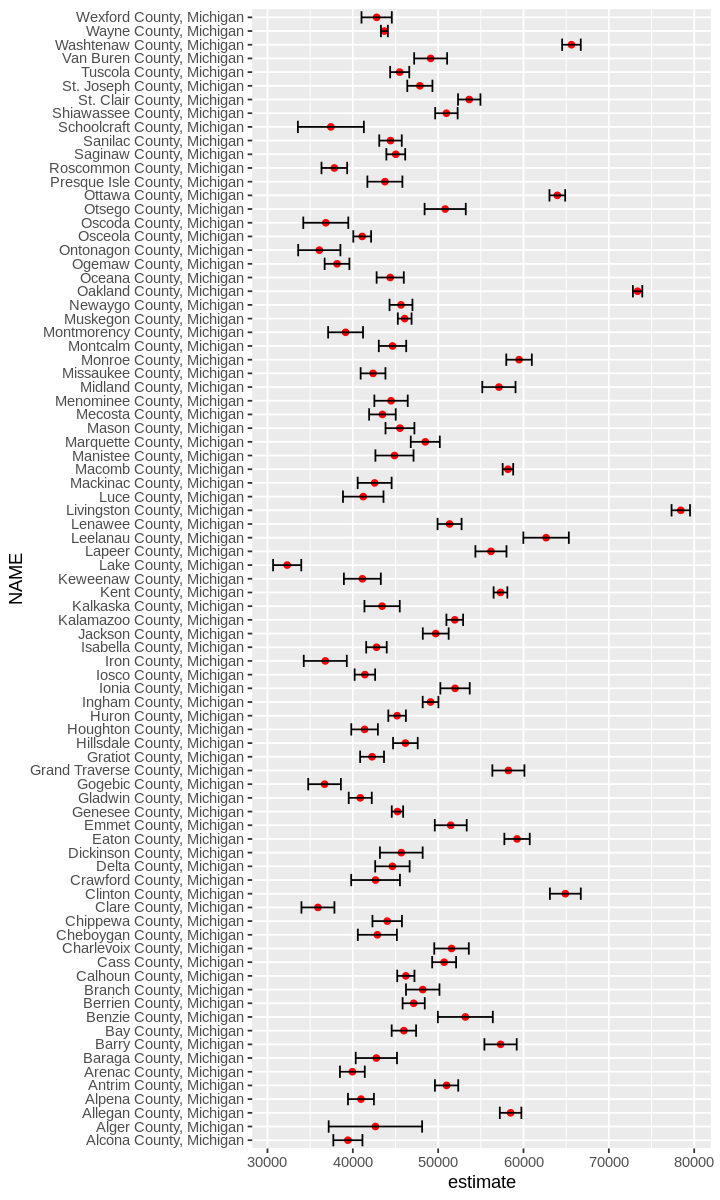

In [51]:
options(repr.plot.width=6, repr.plot.height=10)
filter(inc_2017, str_detect(NAME, "Michigan")) %>% 
    ggplot + 
    geom_point(aes(x=NAME, y=estimate), color="red") + 
    geom_errorbar(aes(x=NAME, ymin = estimate - moe, ymax = estimate + moe)) + 
    coord_flip()

## Exercise (interactive)
Let's make an interesting plot...


## Polling data
The [`pollstR`](https://cran.r-project.org/web/packages/pollstR/vignettes/examples.html) library lets you quickly download polling data.

In [52]:
library(pollstR)

To use the library, you go on to the Pollstr web site and copy the "slug" from the group of polls you want to download. For example, to get polls on [Donald Trump's approval rating](https://elections.huffingtonpost.com/pollster/donald-trump-favorable-rating):

In [53]:
slug <- "donald-trump-favorable-rating"
polls <- pollster_charts_polls(slug)[["content"]]
trendlines <- pollster_charts_trendlines(slug)[["content"]]

Parsed with column specification:
cols(
  Favorable = col_double(),
  Unfavorable = col_double(),
  Undecided = col_double(),
  poll_slug = col_character(),
  survey_house = col_character(),
  start_date = col_date(format = ""),
  end_date = col_date(format = ""),
  question_text = col_character(),
  sample_subpopulation = col_character(),
  observations = col_double(),
  margin_of_error = col_double(),
  mode = col_character(),
  partisanship = col_character(),
  partisan_affiliation = col_character()
)
Parsed with column specification:
cols(
  label = col_character(),
  date = col_date(format = ""),
  value = col_double(),
  low = col_logical(),
  high = col_logical()
)


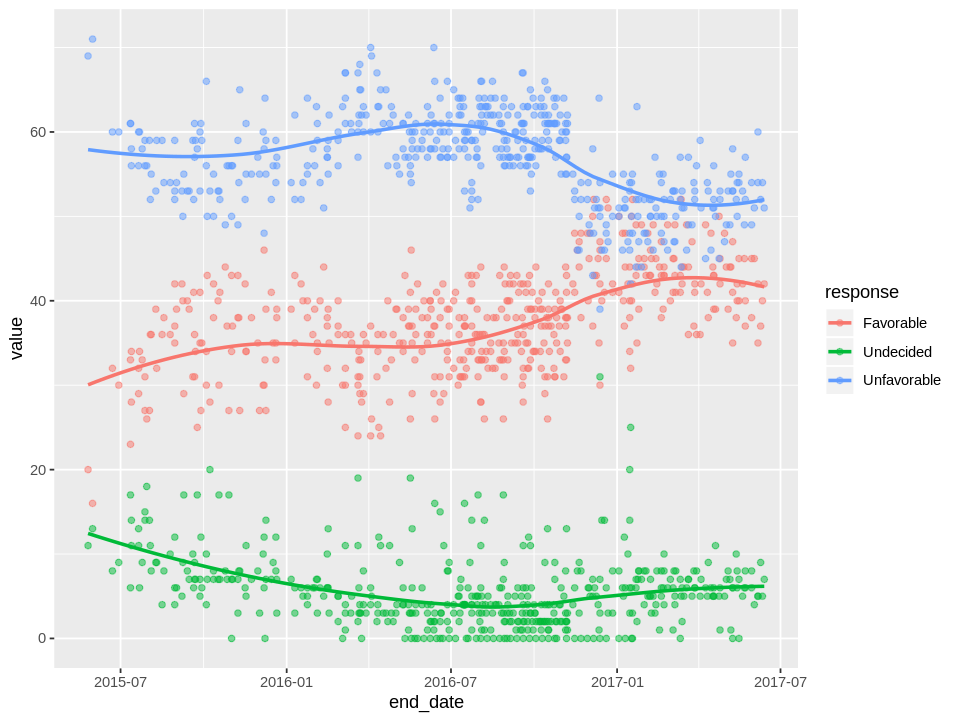

In [54]:
options(repr.plot.width=8, repr.plot.height=6)
.data <- gather(polls, response, value,
                Favorable, Unfavorable, Undecided) %>%
  mutate(value = if_else(is.na(value), 0, value))
ggplot() +
  geom_point(data = .data,
             aes(x = end_date, y = value, color = response),
             alpha = 0.5) +
  geom_smooth(data = .data, method = "loess", se = FALSE,
              aes(x = end_date, y = value, color = response))

## Economic data
The [`blscrapeR`](https://github.com/keberwein/blscrapeR) package can be used to download economic data from the Bureau of Labor Statistics.

In [55]:
library(blscrapeR)
# Grab the Unemployment Rate (U-3) 
df <- quick_unemp_rate()
head(df, 5)

REQUEST_SUCCEEDED


year,period,periodName,latest,value,footnotes,seriesID
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2019,M09,September,true,3.5,,LNS14000000
2019,M08,August,NA,3.7,,LNS14000000
2019,M07,July,NA,3.7,,LNS14000000
2019,M06,June,NA,3.7,,LNS14000000
2019,M05,May,NA,3.6,,LNS14000000


Like the census, there are thousands of different series with unmemorable names. We can search them:

In [56]:
blscrapeR::search_ids(keyword = c("Unemployment", "Detroit"))

series_title,series_id,seasonal,periodicity_code
<chr>,<chr>,<chr>,<chr>
"Unemployment Rate: Balance Of Michigan, State Less Detroit-Warren-Dearborn Msa (S)",LASBS260000000000003,S,M
"Unemployment: Balance Of Michigan, State Less Detroit-Warren-Dearborn Msa (S)",LASBS260000000000004,S,M
"Unemployment Rate: Detroit-Warren-Dearborn, Mi Metropolitan Statistical Area (S)",LASMT261982000000003,S,M
"Unemployment: Detroit-Warren-Dearborn, Mi Metropolitan Statistical Area (S)",LASMT261982000000004,S,M
"Unemployment Rate: Balance Of Michigan, State Less Detroit-Warren-Dearborn Msa (U)",LAUBS260000000000003,U,M
"Unemployment: Balance Of Michigan, State Less Detroit-Warren-Dearborn Msa (U)",LAUBS260000000000004,U,M
"Unemployment Rate: Detroit-Warren-Ann Arbor, Mi Combined Statistical Area (U)",LAUCA262200000000003,U,M
"Unemployment: Detroit-Warren-Ann Arbor, Mi Combined Statistical Area (U)",LAUCA262200000000004,U,M
"Unemployment Rate: Detroit Town, Me (U)",LAUCS231746000000003,U,M


In [57]:
df <- blscrapeR::bls_api("LASMT261982000000003", startyear = 2007) %>% as_tibble %>% print

The API requires both a start and end year.
The endyear argument has automatically been set to 2019.
REQUEST_SUCCEEDED


# A tibble: 120 x 6
    year period periodName value footnotes seriesID            
   <dbl> <chr>  <chr>      <dbl> <chr>     <chr>               
 1  2016 M12    December     4.5 ""        LASMT261982000000003
 2  2016 M11    November     4.6 ""        LASMT261982000000003
 3  2016 M10    October      4.6 ""        LASMT261982000000003
 4  2016 M09    September    4.7 ""        LASMT261982000000003
 5  2016 M08    August       4.8 ""        LASMT261982000000003
 6  2016 M07    July         4.9 ""        LASMT261982000000003
 7  2016 M06    June         5   ""        LASMT261982000000003
 8  2016 M05    May          5   ""        LASMT261982000000003
 9  2016 M04    April        5   ""        LASMT261982000000003
10  2016 M03    March        5.1 ""        LASMT261982000000003
# … with 110 more rows


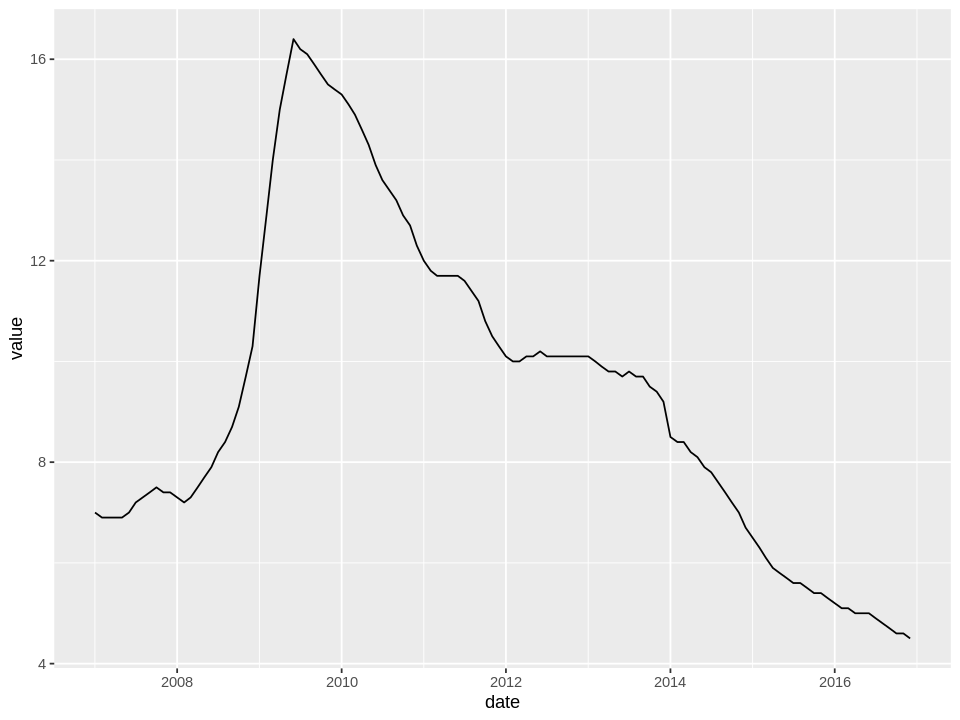

In [58]:
df  %>% mutate(date = lubridate::mdy(str_c(periodName, " 1,", year))) %>%
    ggplot + geom_line(aes(x=date, y=value))

## Climate data
The `rnoaa` package downloads data from weather stations.

In [59]:
library(rnoaa)

To download data for a particular location we need to know its station ID. The simplest way to find this seems to be [by Googling](https://www.google.com/search?q=ncdc+stations+ann+arbor).

In [60]:
ncdc_stations(datasetid='GHCND', stationid='GHCND:USC00200230')

$meta
NULL

$data
  elevation    mindate    maxdate latitude                       name
1     247.8 1891-10-01 2019-10-04 42.29806 ANN ARBOR U OF MICH, MI US
  datacoverage                id elevationUnit longitude
1            1 GHCND:USC00200230        METERS -83.66388

attr(,"class")
[1] "ncdc_stations"

In [61]:
a2.weather <- ghcnd('USC00200230') %>% print

file path:          /home/jovyan/.cache/rnoaa/ghcnd/USC00200230.dly
file last updated:  2019-10-08 13:32:41


# A tibble: 10,813 x 128
   id     year month element VALUE1 MFLAG1 QFLAG1 SFLAG1 VALUE2 MFLAG2 QFLAG2
   <chr> <int> <int> <chr>    <int> <chr>  <chr>  <chr>   <int> <chr>  <chr> 
 1 USC0…  1891    10 TMAX       206 " "    " "    6         267 " "    " "   
 2 USC0…  1891    10 TMIN        78 " "    " "    6         139 " "    " "   
 3 USC0…  1891    10 PRCP        NA " "    " "    " "        NA " "    " "   
 4 USC0…  1891    11 TMAX        78 " "    " "    6          28 " "    " "   
 5 USC0…  1891    11 TMIN        11 " "    " "    6         -44 " "    " "   
 6 USC0…  1891    11 PRCP         0 P      " "    6           0 P      " "   
 7 USC0…  1891    11 SNOW         0 " "    " "    6           0 " "    " "   
 8 USC0…  1891    12 TMAX        22 " "    " "    6          44 " "    " "   
 9 USC0…  1891    12 TMIN       -94 " "    " "    6          11 " "    " "   
10 USC0…  1892     1 TMAX       117 " "    " "    6          94 " "    " "   
# … with 10,803 more rows, and 117 more

## Exercise
What were the extreme snowiest years in Ann Arbor? Months? Days?

In [63]:
## Solution